In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
import sqlalchemy
from sqlalchemy import create_engine, MetaData
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import create_engine, inspect, func
import matplotlib.pyplot as plt
from sqlalchemy.orm import Session
from datetime import date

In [2]:
engine = create_engine('sqlite:///hawaii.sqlite', echo=False)
conn = engine.connect()

In [3]:
Base = automap_base()
Base.prepare(engine,reflect=True)
Measurement = Base.classes.measurement
Station = Base.classes.station
session = Session(bind = engine)

In [4]:
Base.classes.keys()

['measurement', 'station']

In [5]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

## Precipitation Analysis

In [6]:
results = session.query(Measurement.date,Measurement.tobs).all()
results

[('2010-01-01', 66.0),
 ('2010-01-02', 70.0),
 ('2010-01-03', 75.0),
 ('2010-01-04', 75.0),
 ('2010-01-05', 75.0),
 ('2010-01-06', 72.0),
 ('2010-01-07', 70.0),
 ('2010-01-08', 63.0),
 ('2010-01-09', 68.0),
 ('2010-01-10', 74.0),
 ('2010-01-11', 64.0),
 ('2010-01-12', 57.0),
 ('2010-01-13', 57.0),
 ('2010-01-14', 65.0),
 ('2010-01-15', 56.0),
 ('2010-01-16', 66.0),
 ('2010-01-18', 73.0),
 ('2010-01-19', 61.0),
 ('2010-01-20', 66.0),
 ('2010-01-21', 68.0),
 ('2010-01-22', 60.0),
 ('2010-01-23', 78.0),
 ('2010-01-24', 71.0),
 ('2010-01-25', 68.0),
 ('2010-01-26', 76.0),
 ('2010-01-27', 69.0),
 ('2010-01-29', 65.0),
 ('2010-01-30', 77.0),
 ('2010-01-31', 71.0),
 ('2010-02-01', 64.0),
 ('2010-02-02', 65.0),
 ('2010-02-03', 64.0),
 ('2010-02-04', 64.0),
 ('2010-02-05', 63.0),
 ('2010-02-06', 67.0),
 ('2010-02-08', 60.0),
 ('2010-02-09', 61.0),
 ('2010-02-10', 60.0),
 ('2010-02-11', 70.0),
 ('2010-02-12', 68.0),
 ('2010-02-13', 67.0),
 ('2010-02-14', 69.0),
 ('2010-02-15', 72.0),
 ('2010-02-

In [7]:
Precepetation_data = session.query(Measurement.date,Measurement.tobs).\
filter(Measurement.date >="2017-01-01").\
all()
Precepetation_data = pd.DataFrame(Precepetation_data)
Precepetation_data = Precepetation_data.set_index(['date'])
Precepetation_data.head()


,tobs
date,
2017-01-01,66.0
2017-01-02,66.0
2017-01-03,65.0
2017-01-04,64.0
2017-01-05,65.0


In [8]:
Precepetation_data.count()

tobs    1267
dtype: int64

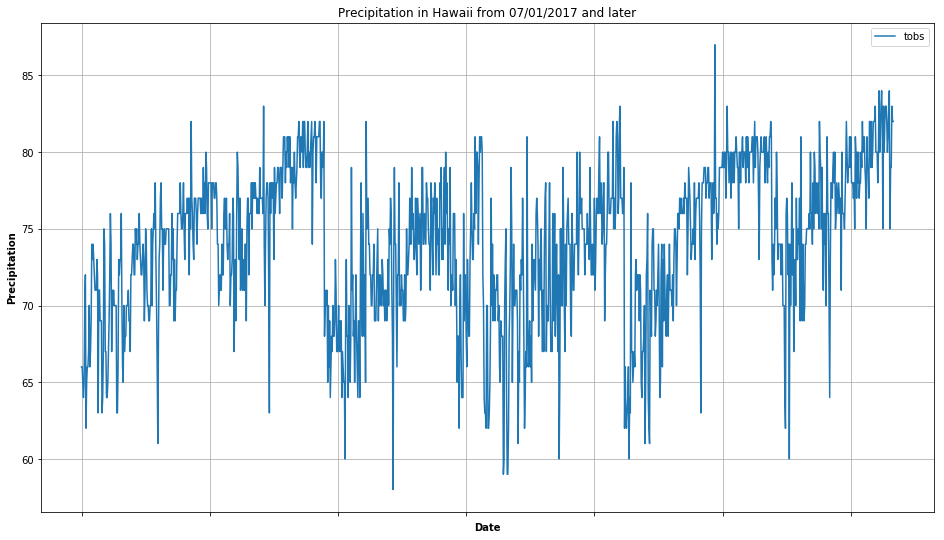

In [9]:
Precepetation_plot = Precepetation_data.plot(figsize = (16, 9), sort_columns=True, use_index=True, legend=True, grid=True)
plt.ylabel('Precipitation', weight='bold')
plt.xlabel('Date', weight='bold')
plt.title("Precipitation in Hawaii from 07/01/2017 and later")
plt.savefig('PrecipitationHawaii.png')
plt.show()

## Summary statistics for the precipitation data

In [10]:
Precepetation_data.describe()

,tobs
count,1267.000000
mean,74.020521
std,4.951859
min,58.000000
25%,71.000000
50%,75.000000
75%,78.000000
max,87.000000


## Station Analysis

In [11]:
Stations_data = pd.DataFrame(engine.execute('SELECT * FROM station').fetchall())
Stations_data.columns = ['index','station','name','latitude','longitude','elevation','Location']
Stations_data

,index,station,name,latitude,longitude,elevation,Location
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,None
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,None
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,None
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,None
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6,None
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,None
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,None
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9,None
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,None


### Query to calculate the total number of stations

In [12]:
session.query(Station.id).count()

9

### Query to find the most active stations

In [13]:
Active_stations = session.query(Measurement.station, Station.name, func.count(Measurement.tobs)).\
filter(Measurement.station == Station.station).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()
Active_stations

[('USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2696),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 2685),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2572),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2484),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 1937),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1932),
 ('USC00517948', 'PEARL CITY, HI US', 683),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 342)]

### Which station has the highest number of observations?

In [14]:
Most_Active = pd.DataFrame(session.query(Measurement.date,Measurement.tobs).\
filter(Measurement.station == "USC00519281", Measurement.date >="2017-01-01").\
all())
Most_Active = Most_Active.set_index(['date'])
Most_Active.head()

,tobs
date,
2017-01-01,72.0
2017-01-02,70.0
2017-01-03,64.0
2017-01-04,63.0
2017-01-05,63.0


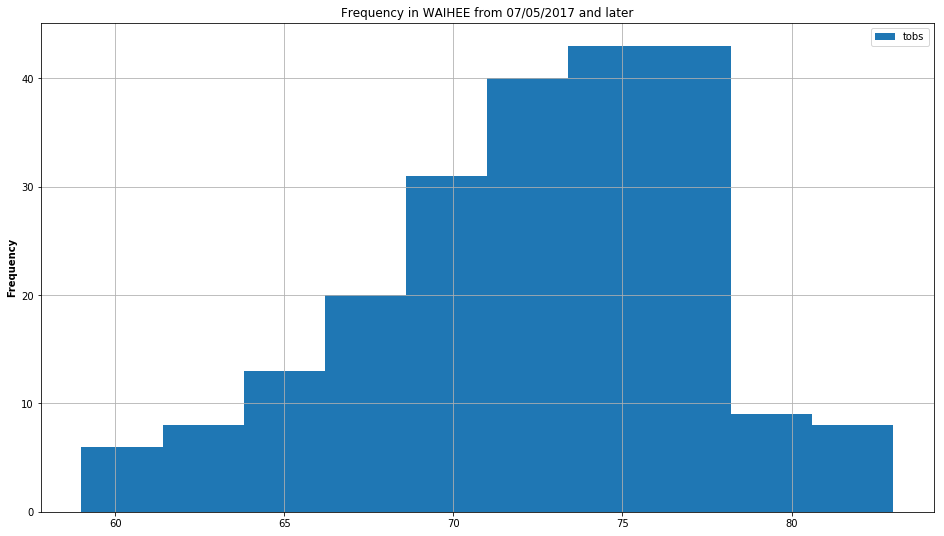

In [15]:
Most_Active_plot = Most_Active.plot(kind='hist', figsize = (16, 9), grid=True)
plt.ylabel('Frequency', weight='bold')
plt.title("Frequency in WAIHEE from 07/05/2017 and later")
plt.savefig('temp_hist.png')
plt.show()

### Temperature Analysis

In [16]:
def calc_temps(start, end):
    query = session.query(Measurement.tobs).filter(Measurement.date>=start, Measurement.date<=end).all()
    temperatures = [temp[0] for temp in query]
    avg_temp = np.mean(temperatures)
    lowest_temp = min(temperatures)
    highest_temp = max(temperatures)
    
    plt.figure(figsize=(3,5))
    plt.bar(1, avg_temp, yerr=(highest_temp - lowest_temp), tick_label='', color='salmon')
    plt.ylabel("Temp(F)", weight="bold")
    plt.title("Average Trip Temperature", weight="bold")
    plt.savefig('temp_avg.png')
    plt.show()

In [17]:
columns = inspector.get_columns('Measurement')
for column in columns:
    print(column['name'])

id
station
date
prcp
tobs


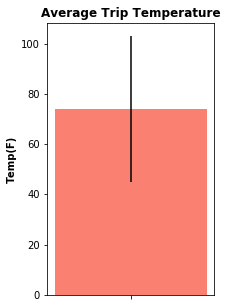

In [18]:
calc_temps(start="2017-01-01", end="2018-01-01")